# Customer Segmentation – Retail Marketing:
Customer segmentation is one of the most impactful applications of data analytics in marketing. It enables businesses to group customers based on their demographics, purchasing behavior, and engagement patterns, allowing for more personalized and effective strategies.

In this project, we apply clustering techniques to a retail marketing dataset. The dataset includes customer demographics (such as income and family details), recency of purchases, and spending across multiple product categories (wines, meats, fruits, fish, sweets, and gold). The primary objective is to identify distinct customer segments that vary in income levels, purchase frequency, and product preferences. This helps businesses to:
* Recognize high-value, loyal customers
* Identify inactive or budget-restricted shoppers
* Understand selective buyers with specific product focus
* Profile balanced shoppers with diverse spending habits

We use K-Means clustering as the primary algorithm, evaluate the clusters with the Silhouette Score, and then profile each cluster using key variables such as income, recency, and category-wise spending.

The insights derived from this analysis provide a strong foundation for targeted marketing campaigns, helping to improve customer engagement, retention, and overall return on marketing investment (ROI).


# Importing the Libraries and Understanding the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Data Sets/Retail Data.csv')

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.shape

(2240, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


# Data Cleaning & Preprocessing

Because the proportion of missing values is minimal, it is more practical to drop them instead of applying imputation.

In [9]:
df = df.dropna()

In [10]:
parts = df["Dt_Customer"].str.split("-", n=3, expand=True)
df["day"] = parts[0].astype('int')
df["month"] = parts[1].astype('int')
df["year"] = parts[2].astype('int')

In [11]:
# Removing unnecessary features
unn_col=['ID','Z_CostContact','Z_Revenue']
df=df.drop(columns=unn_col,axis=1)

# Exploratory Data Analysis (EDA)

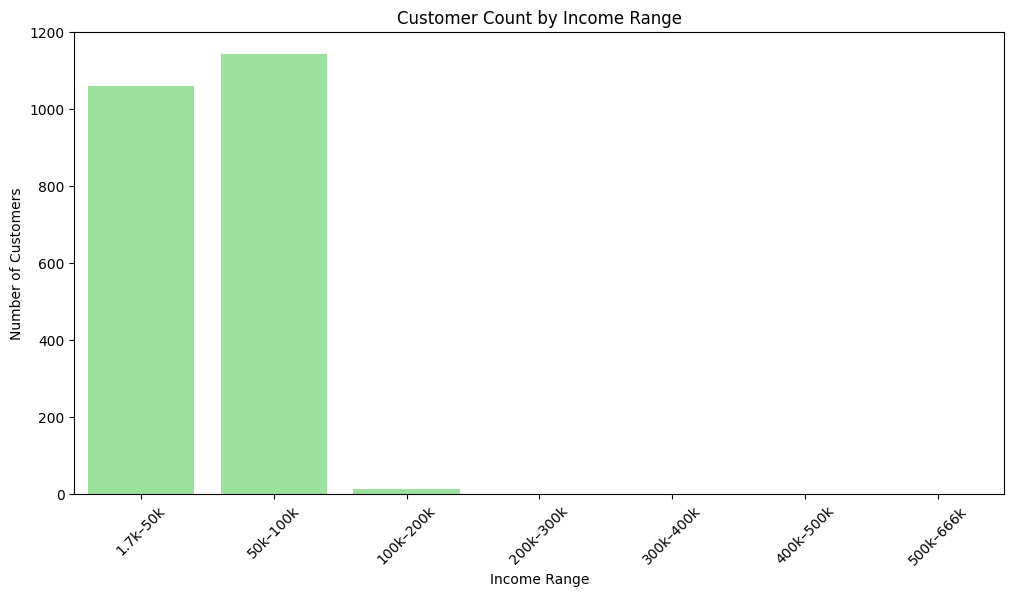

In [12]:
bins = [1730, 50000, 100000, 200000, 300000, 400000, 500000, 666666]
labels = ["1.7k–50k", "50k–100k", "100k–200k", "200k–300k", "300k–400k", "400k–500k", "500k–666k"]
income_bins = pd.cut(df["Income"], bins=bins, labels=labels, include_lowest=True)
plt.figure(figsize=(12,6))
sns.countplot(x=income_bins, order=labels, color='#90EE90')
plt.title("Customer Count by Income Range")
plt.xlabel("Income Range")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

**Customer count by Income**
* The vast majority of customers fall into the two lowest income brackets:
    * 1.7k–50k and 50k–100k
* Very few customers earn more than 100k, and the count drops dramatically in higher income brackets.

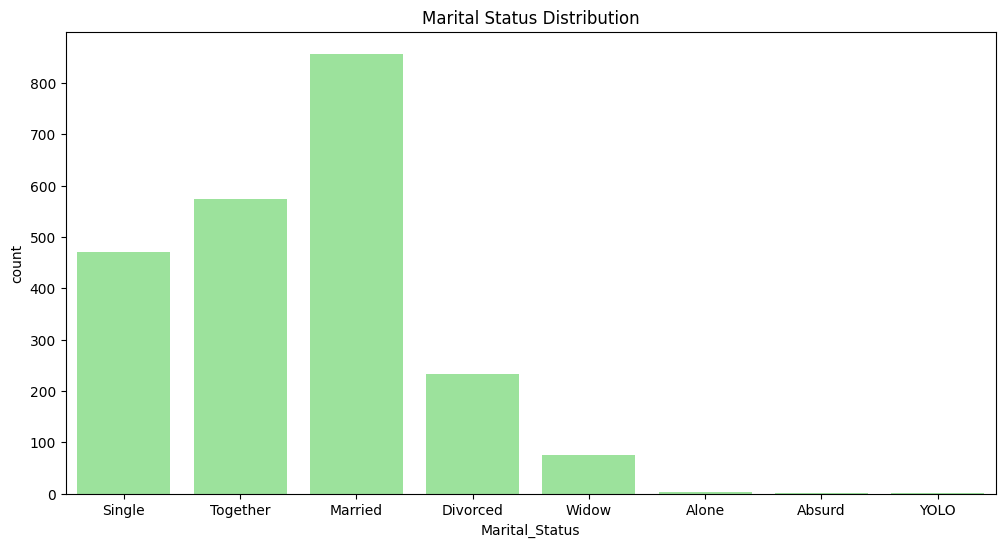

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(x="Marital_Status", data=df, color='#90EE90' )
plt.title("Marital Status Distribution")
plt.show()

**Marital Status of Customers**
* The majority of customers fall under these categories:
    * Married
    * Together
* Followed by:
    * Single
    * Divorced
    * Widow
* Very few customers are labeled with categories like:
    * Absurd, YOLO, Alone, Unmarried, Widowed, etc.

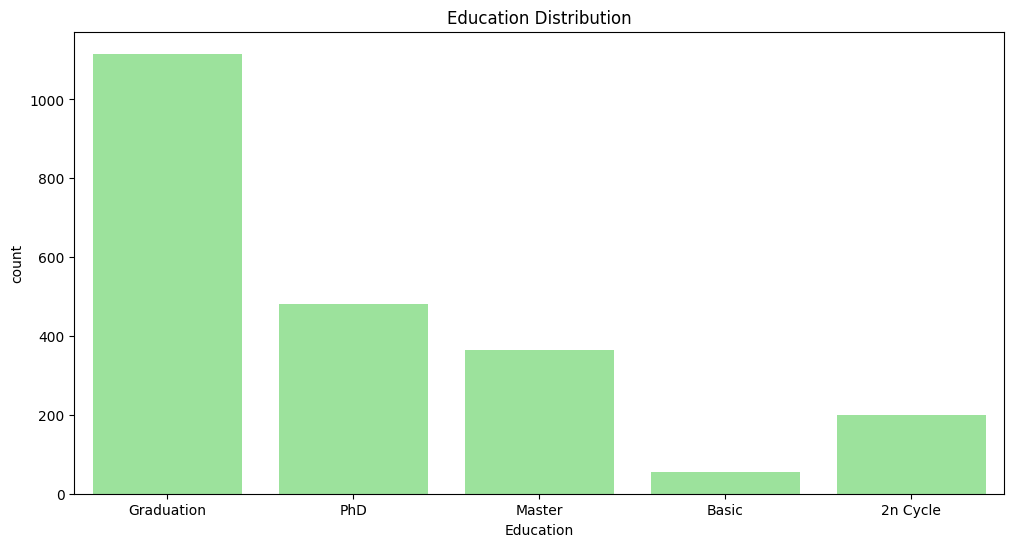

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x="Education", data=df, color='#90EE90')
plt.title("Education Distribution")
plt.show()

**Education Level of Customers**
* The largest group of customers has a university degree, indicating a well-educated customer base.
* This is followed by:
    * Graduates
    * PhD holders
    * Basic and 2n Cycle education levels
* The number of customers with only basic education is very low compared to those with higher education.

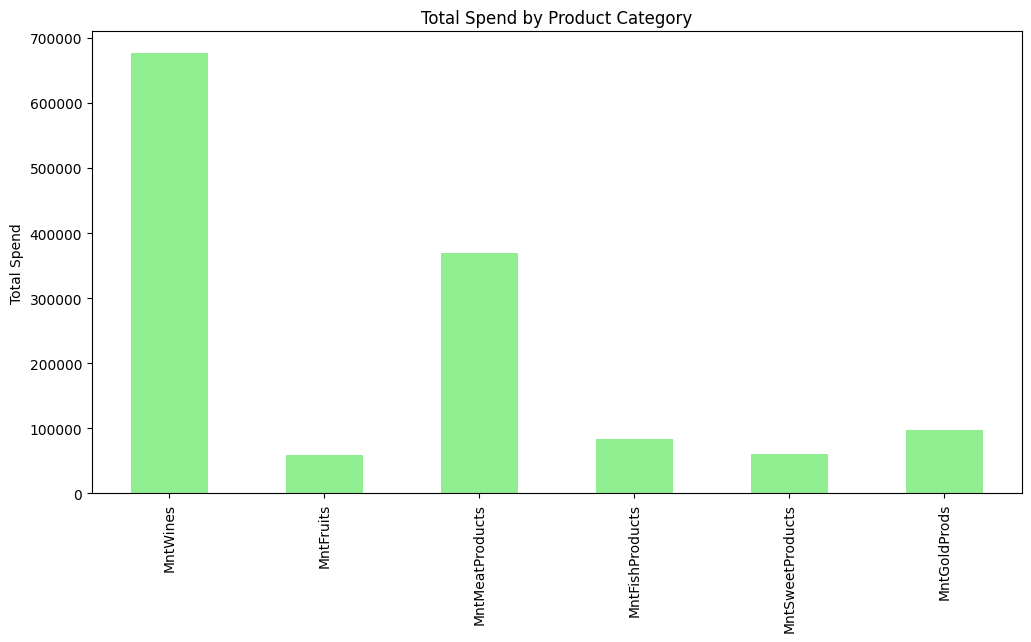

In [15]:
spend_cols = ["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]
df[spend_cols].sum().plot(kind="bar", figsize=(12,6), color="#90EE90")
plt.title("Total Spend by Product Category")
plt.ylabel("Total Spend")
plt.show()

**Total Spend by Product Category**
* Wine is the most purchased product category by a large margin.
* This is followed by meat products, which also see substantial spending.
* Fruits, gold products, fish, and sweet products receive considerably less spending.

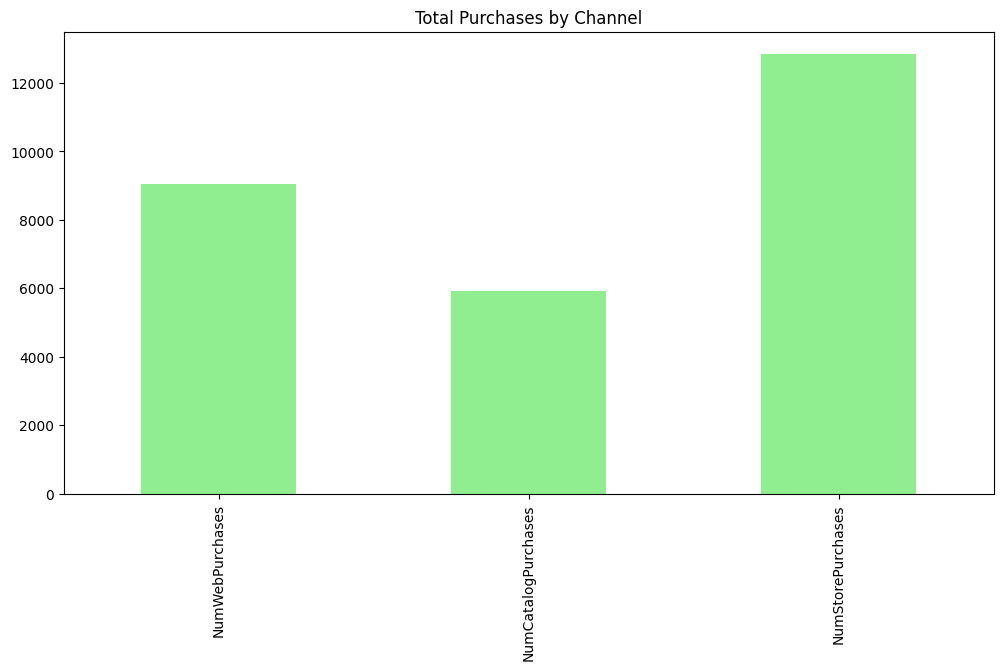

In [16]:
purchase_cols = ["NumWebPurchases","NumCatalogPurchases","NumStorePurchases"]
df[purchase_cols].sum().plot(kind="bar", figsize=(12,6), color="#90EE90")
plt.title("Total Purchases by Channel")
plt.show()

**Total Purchases by Channel**
* In-store purchases dominate, indicating that the majority of customers prefer physical retail.
* Web purchases come second, showing a significant online presence.
* Catalog purchases are the least used, suggesting this channel may be declining or underutilized.

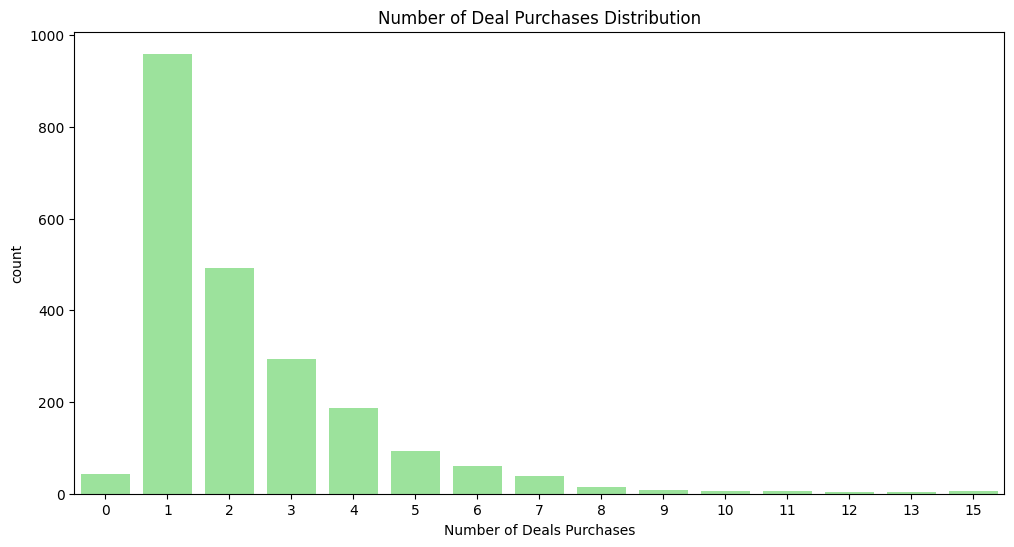

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x=df["NumDealsPurchases"],color='#90EE90')
plt.title("Number of Deal Purchases Distribution")
plt.xlabel("Number of Deals Purchases")
plt.show()

**Number of Deal Purchases Distribution**
* The majority of customers made 0 to 2 deal purchases, with a sharp peak at 1 deal purchase.
* There is a gradual decline in the number of customers as the number of deal purchases increases.
* Very few customers make more than 8 deal purchases.
* The distribution is right-skewed, indicating most customers rarely use deals, while a small subset frequently does.

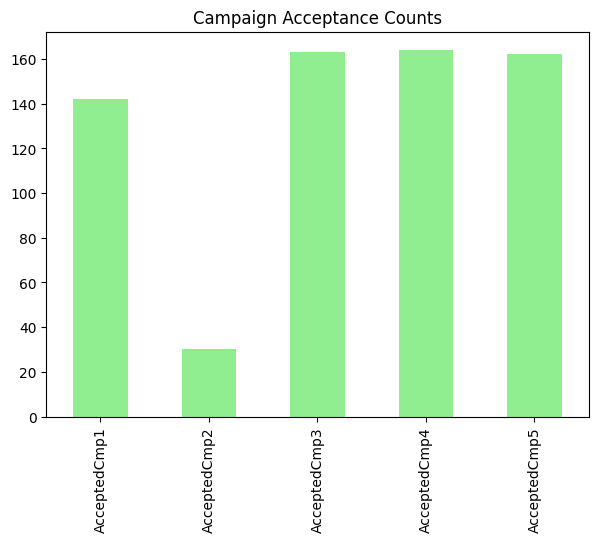

In [18]:
campaign_cols = ["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5"]
df[campaign_cols].sum().plot(kind="bar", figsize=(7,5), color='#90EE90')
plt.title("Campaign Acceptance Counts")
plt.show()

**Campaign Acceptance Counts**
* Most campaigns have good engagement except Campaign 2, which underperforms.
* This could indicate issues with Campaign 2's messaging, offer, timing, or target audience.
* The marketing team should investigate Campaign 2 further and consider adjusting it.
* Successful campaigns (1, 3, 4, 5) may share characteristics or targeting strategies that can be applied more broadly.

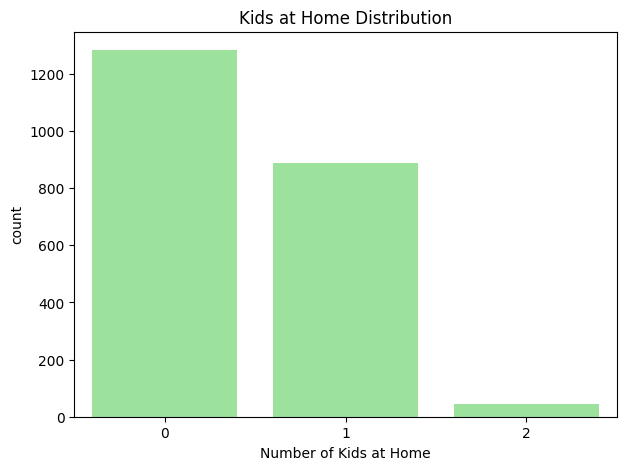

In [19]:
plt.figure(figsize=(7,5))
sns.countplot(x="Kidhome", data=df, color='#90EE90')
plt.title("Kids at Home Distribution")
plt.xlabel("Number of Kids at Home")
plt.show()

**Number of Kids at Home Distribution**
* Majority Without Kids: The largest segment of your customer base consists of individuals without kids at home, which may reflect either single adults, couples without children, or empty nesters.
* Moderate Family Size: A significant portion has 1 child, suggesting a potential interest in family-oriented products, but not large-family targeting.
* Small Segment with 2 Kids.

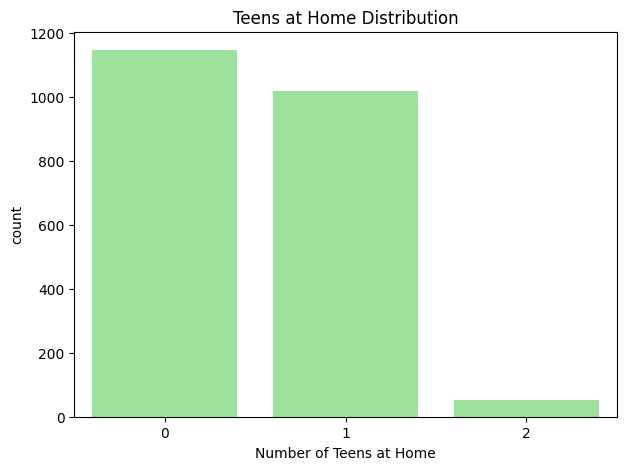

In [20]:
plt.figure(figsize=(7,5))
sns.countplot(x="Teenhome", data=df,color='#90EE90')
plt.title("Teens at Home Distribution")
plt.xlabel("Number of Teens at Home")
plt.show()

**Number of Teens at Home Distribution**
* Majority Have Few or No Teenagers:
Most customers have 0 or 1 teenager at home, similar to the Kidhome distribution pattern.
* Low Proportion of Larger Teen Families:
Families with 2 teens at home are a minority, possibly indicating older families with teens who have moved out or smaller family sizes.

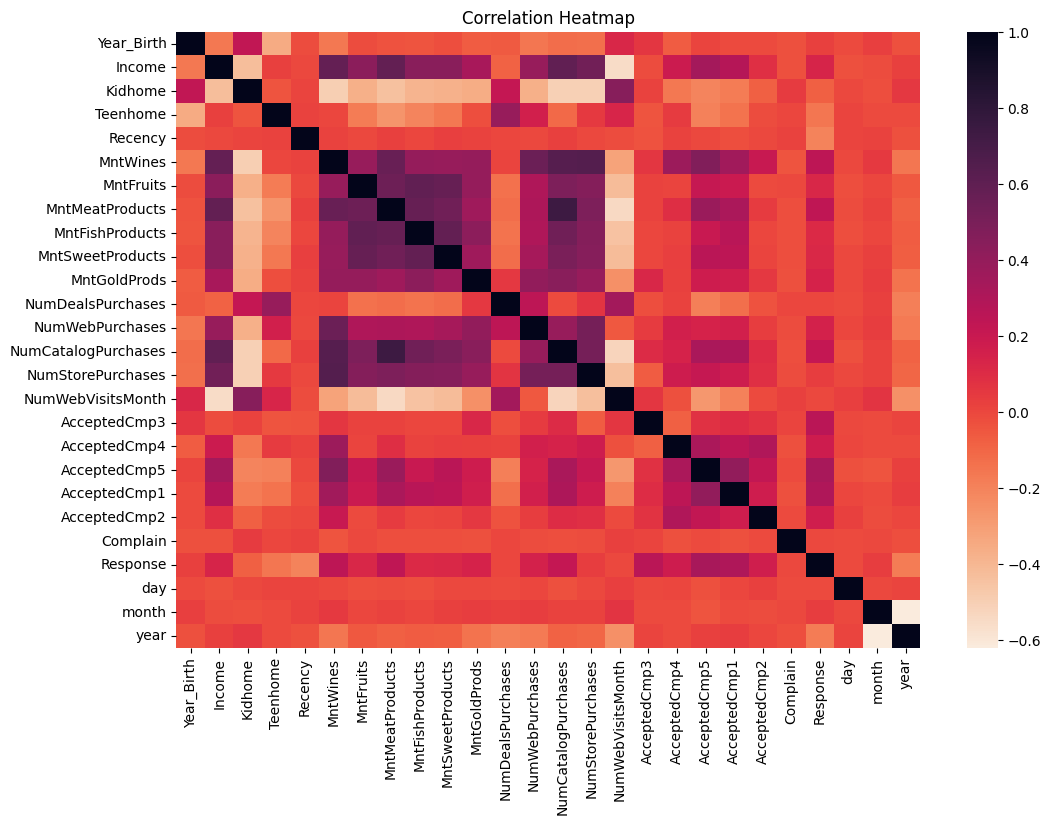

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=["number"]).corr(), cmap="rocket_r", annot=False)
plt.title("Correlation Heatmap")
plt.show()

**Correlation Heatmap Analysis**
* Product spend columns like MntWines, MntMeatProducts, MntGoldProds, etc. correlate strongly with NumWebPurchases, NumStorePurchases and Income.
* Most other parts of the heatmap appear light blue — these indicate weak or no linear correlation between the pairs.

# Feature Engineering

In [22]:
df = pd.get_dummies(df, columns=["Education","Marital_Status"], drop_first=True)

# Select Features for Clustering

In [23]:
drp_col=['Year_Birth', 'Dt_Customer', 'Response']
X=df.drop(columns=drp_col,axis=1)

# KMeans

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

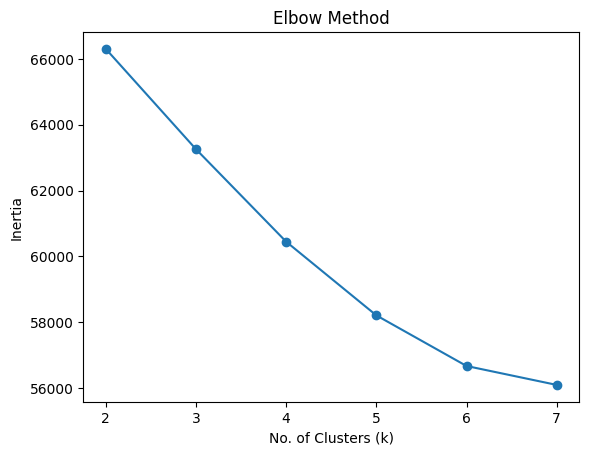

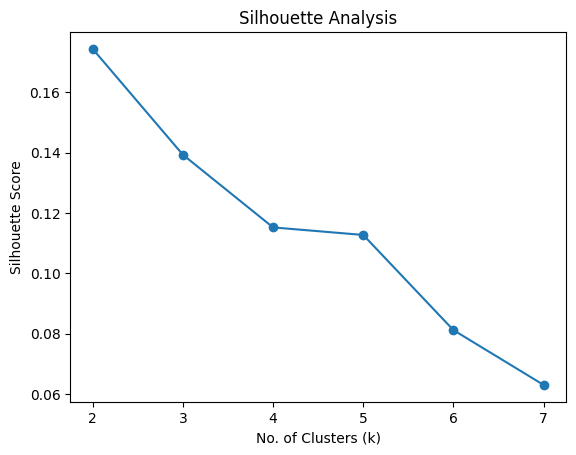

In [26]:
inertia = []
silhouette = []

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

# Elbow Method
plt.plot(range(2,8), inertia, marker="o")
plt.xlabel("No. of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Silhouette Score
plt.plot(range(2,8), silhouette, marker="o")
plt.xlabel("No. of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

* **Elbow Method:**
  * The curve keeps decreasing as k increases
  * The "elbow" seems to be around k = 3 or 4.
* **Silhouette Analysis:**
  * The silhouette score is highest at k = 2, but usually, we avoid k=2 unless the data is very binary.
  * After that, the score drops for k=3 but improves around k=4–5, and then goes down again.
* **Conclusion:**
  * Best cluster number (k): 4

Because both methods support it:
* Elbow shows a bend around 3–4.
* Silhouette suggests 4 is better than higher numbers.

In [27]:
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

In [28]:
score = silhouette_score(X_scaled, kmeans.labels_)
print("Silhouette Score:", score)

Silhouette Score: 0.11522323197760612


In [29]:
df["Cluster"] = kmeans.labels_
print(df["Cluster"].value_counts())

Cluster
0    1030
2     560
3     410
1     216
Name: count, dtype: int64


**KMeans Conclusion:**
* Silhouette Score = 0.115:

This is low, meaning clusters are not very well-separated and overlap quite a lot. But in real-world marketing/customer data, this is common because behavior overlaps naturally.
* Cluster sizes:
  * Cluster 0 → 1030 customers (largest group)
  * Cluster 2 → 560 customers
  * Cluster 3 → 410 customers
  * Cluster 1 → 216 customers (smallest group)

In [30]:
cluster_profile = df.groupby("Cluster")[['Income','Recency','MntWines','MntFruits',
                                         'MntMeatProducts','MntFishProducts',
                                         'MntSweetProducts','MntGoldProds',
                                         'NumWebPurchases','NumCatalogPurchases',
                                         'NumStorePurchases','NumWebVisitsMonth']].mean()

print(cluster_profile)

               Income    Recency    MntWines  MntFruits  MntMeatProducts  \
Cluster                                                                    
0        34918.312621  49.074757   41.967961   4.922330        23.011650   
1        81110.481481  49.953704  822.240741  57.101852       474.342593   
2        57455.364286  48.373214  468.150000  19.878571       132.112500   
3        73461.412195  49.234146  470.946341  72.851220       414.439024   

         MntFishProducts  MntSweetProducts  MntGoldProds  NumWebPurchases  \
Cluster                                                                     
0               7.310680          4.988350     15.366990         2.110680   
1              88.810185         65.981481     80.759259         5.486111   
2              27.092857         20.635714     60.373214         6.432143   
3             101.268293         70.609756     74.014634         5.102439   

         NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  
Cluster    

In [31]:
edu_profile = df.groupby("Cluster")[['Education_Basic','Education_Graduation',
                                     'Education_Master','Education_PhD']].mean()

marital_profile = df.groupby("Cluster")[['Marital_Status_Alone',
                                         'Marital_Status_Married',
                                         'Marital_Status_Single']].mean()

/tmp/ipython-input-2593274816.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y="Income", data=df, palette="Set2")


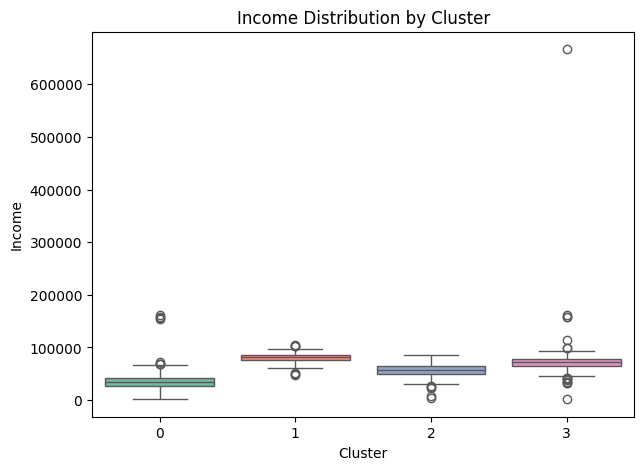

In [32]:
plt.figure(figsize=(7,5))
sns.boxplot(x="Cluster", y="Income", data=df, palette="Set2")
plt.title("Income Distribution by Cluster")
plt.show()

**Income Distribution by Cluster**
* Cluster 0:
  * Shows the lowest median income, and the largest interquartile range, indicating high variability.
  * Contains many outliers but is overall a low-income segment.
  * Marketing strategies for this cluster should focus on affordability and value-for-money offerings.
* Cluster 1:
  * Has the highest median income among all clusters.
  * The distribution is relatively compact with few outliers, indicating a more homogeneous group in terms of income.
  * This cluster likely represents high-income customers and could be targeted for premium products or services.
* Cluster 2:
  * Displays a moderate median income, slightly lower than Cluster 1.
  * Shows a wider spread, with several outliers on both ends, suggesting some variability in income.
  * May represent middle-income customers with diverse spending capacity.
* Cluster 3:
  * Has a comparable median to Cluster 2, but the range is wider with notable high-income outliers, including a very extreme one
  * Could include a mix of middle to high-income individuals, with a few very wealthy customers.
  * May benefit from further segmentation to isolate the ultra-high-income group.

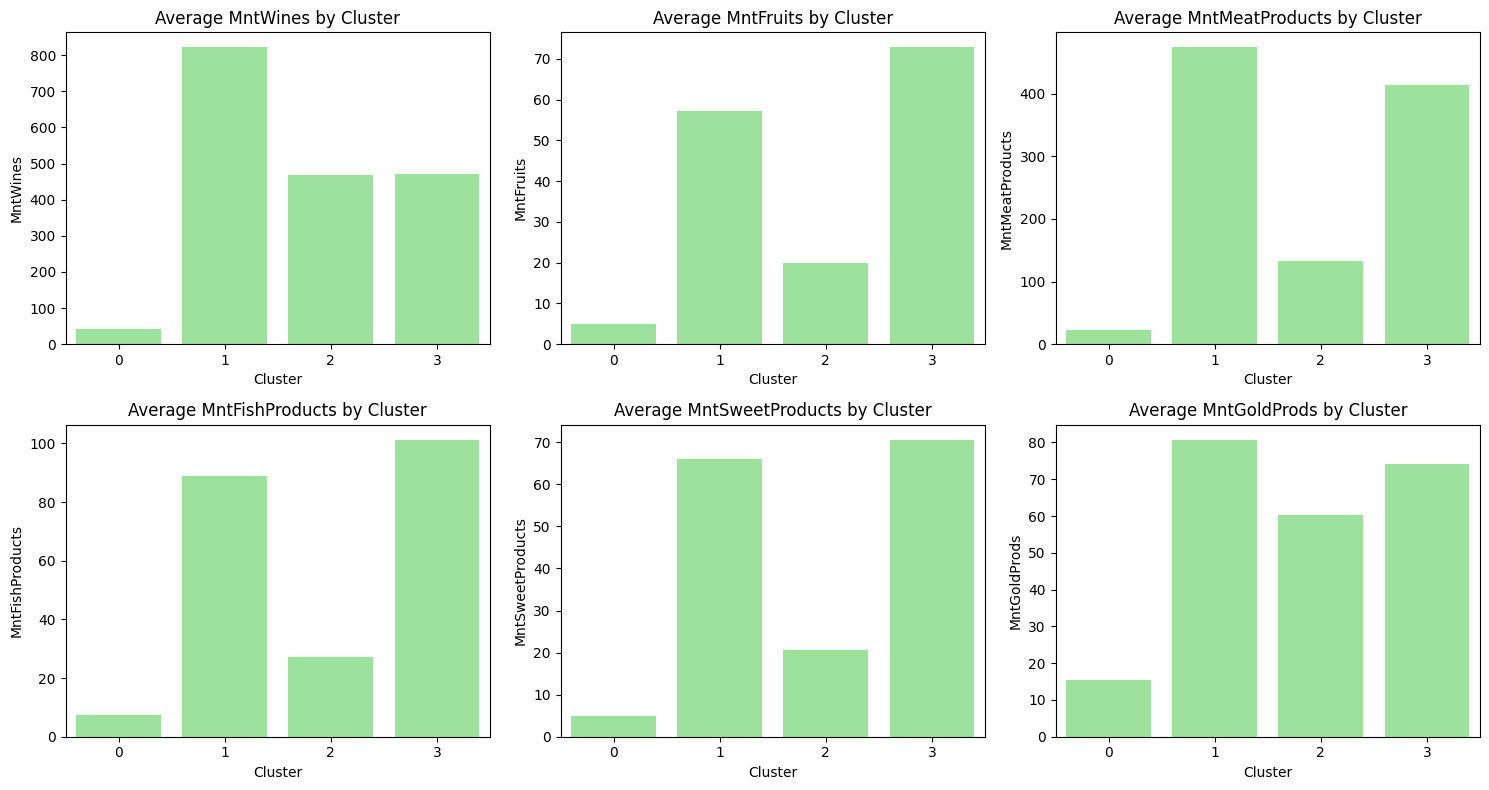

In [33]:
mnt_vars = ["MntWines", "MntFruits", "MntMeatProducts",
            "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

plt.figure(figsize=(15, 8))
for i, var in enumerate(mnt_vars, 1):
    plt.subplot(2, 3, i)   # 2 rows, 3 columns layout
    sns.barplot(x="Cluster", y=var, data=df, estimator=np.mean,color='#90EE90',errorbar=None)
    plt.title(f"Average {var} by Cluster")

plt.tight_layout()
plt.show()

**Customer Segmentation Insights Across Product Categories**
* Cluster 0 — The Low Income / Minimalists
  * Very low spending across all product categories.
  * Possibly students, low-income earners, or non-engaged users.
  * May not be the target market for most campaigns.
  * Likely not profitable for high-cost promotions or retention efforts.
  * Strategy: Target only with entry-level offers, low-cost samples, or monitor for potential growth signals.
* Cluster 1 — The Premium Shoppers
  * Highest spending across almost all categories: wine, meat, fruits, fish, sweets, and gold products.
  * Strong, consistent preference for premium food and non-food items.
  * Likely to be wealthy, brand-conscious, and loyal customers.
  * Strategy: Focus marketing on exclusive offers, premium memberships, loyalty rewards, and cross-sell bundles
* Cluster 2 — The Moderate Consumers
  * Moderate spending in all categories, with meat and wine slightly higher than fruits and sweets.
  * Appears to be a budget-conscious but stable group.
  * Less interested in luxury products.
  * Strategy: Focus on discounts, budget deals, loyalty points, and subscription savings.
* Cluster 3 — The Balanced High Spenders
  * High spending in meat, wine, fish, sweets, fruits, and gold products.
  * Very close to Cluster 1 in many categories.
  * Possibly family-oriented shoppers or upper-middle class households.
  * Strategy: Offer value-based bundles, family packs, and targeted promotions. Could be upsold to Cluster 1-tier if nudged with premium loyalty programs.

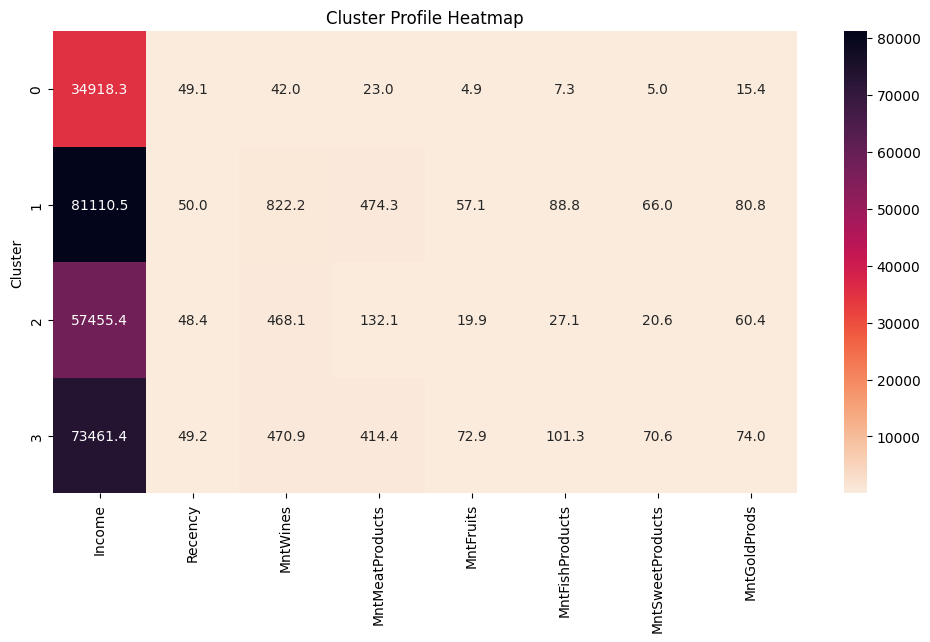

In [34]:
cluster_profile = df.groupby("Cluster")[["Income", "Recency",
                                         "MntWines", "MntMeatProducts",
                                         "MntFruits", "MntFishProducts",
                                         "MntSweetProducts", "MntGoldProds"]].mean()

plt.figure(figsize=(12,6))
sns.heatmap(cluster_profile, annot=True, fmt=".1f", cmap="rocket_r")
plt.title("Cluster Profile Heatmap")
plt.show()

**Cluster Profile Analysis**
* Cluster 0 — Low-Income, Inactive Shoppers
  * Income: Lowest (~35,000)
  * Recency: 49.1; moderately recent
  * Spending: Extremely low across all categories
  * Interpretation:
    * Possibly low-income, budget-restricted customers
    * Not actively engaged or loyal
* Cluster 1 — High-Income, High-Value Loyalists
  * Income: Highest (~81,000)
  * Recency: Best; 50 = most recent
  * Spending: Highest in almost all categories.
  * Interpretation:
    * Top-tier customers in income and engagement
    * Highly responsive, frequent shoppers
    * Likely brand-loyal, luxury/premium market
* Cluster 2 — Middle-Income, Selective Buyers
  * Income: Moderate; ~57,000
  * Recency: 48.4 slightly less recent.
  * Spending: Low overall, especially in fruits, fish, sweets.
  * Interpretation:
    * Occasional buyers
    * Possibly price-sensitive
    * Spend mostly on essentials
* Cluster 3 — Upper-Middle Class, Balanced Shoppers
  * Income: High (~73,000)
  * Recency: 49.2
  * Spending: High and balanced across all categories
    * Highest in fruits, fish, sweets
    * Strong meat and wine purchases too
  * Interpretation:
   * Family-focused or lifestyle-driven
   * Consistent spenders, with a healthy and balanced purchase pattern

In [37]:
cluster_labels = {
    0: "Low-Income, Inactive Shoppers",
    1: "High-Income, High-Value Loyalists",
    2: "Middle-Income, Selective Buyers",
    3: "Upper-Middle Class, Balanced Shoppers"
}

df["Cluster_Label"] = df["Cluster"].map(cluster_labels)

In [38]:
print(df["Cluster_Label"].value_counts())

Cluster_Label
Low-Income, Inactive Shoppers            1030
Middle-Income, Selective Buyers           560
Upper-Middle Class, Balanced Shoppers     410
High-Income, High-Value Loyalists         216
Name: count, dtype: int64


**Conclusion:**

The customer segmentation analysis using K-Means clustering successfully identified four distinct customer groups within the retail marketing dataset.
* Cluster 0: Low-income, inactive shoppers with very low spending across all categories.
* Cluster 1: High-income, loyal customers who are highly engaged and contribute the most to overall revenue.
* Cluster 2: Middle-income, selective buyers who purchase occasionally and focus on essentials.
* Cluster 3: Upper-middle-class, balanced shoppers with diverse and consistent spending habits.

**Business Impact:**
* Enables personalized marketing strategies for each segment
* Improves customer engagement by addressing unique needs of each group.
* Supports data-driven decision-making in marketing investments to maximize ROI.
